## Reproduction Wang et al

In [1]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
import matplotlib.patches as pat
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# decision trees
from sklearn.tree import DecisionTreeRegressor
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# support vector machines
from sklearn.svm import SVR
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans
# metrics
from sklearn.metrics import mean_absolute_error

# neural network
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

# we use it to interact with the file system
import os
# compute time
from time import time, sleep
# iterator
import itertools
# handling json file
import json

# no warning
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


### Figure 1

In [2]:
tech_df = pd.read_csv("./data/techpower_hard.csv")

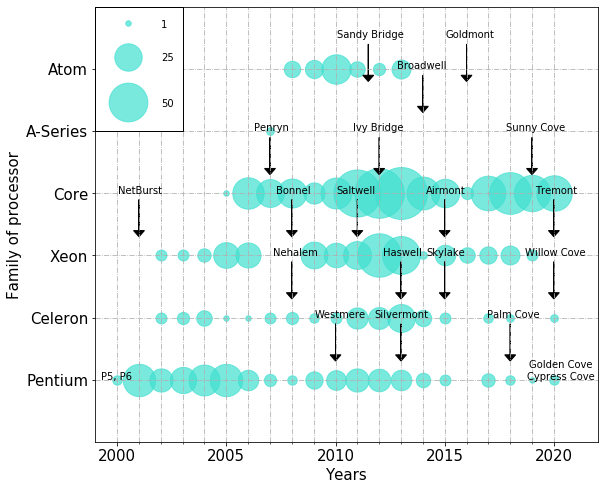

In [3]:
tech_df_intel = tech_df.query("Producer == 'Intel'")

test_df = tech_df_intel.groupby(["Range","rel_year"]).count()

vals = tech_df_intel["Range"].unique()
years = [k for k in range(2000, 2021)]


fig, ax = plt.subplots(figsize=((9,8)))

for y in years:
    for i in range(len(vals)):
        lab = vals[i]
        if (lab, y) in test_df.index:
            ax.scatter(y, i, s = 30*test_df.loc[(lab,y)]["Producer"], color = "turquoise", alpha =0.7)

            
arch_names = ["P5, P6", "NetBurst", "Penryn", "Nehalem", "Bonnel", 
              "Westmere", "Saltwell", "Sandy Bridge", "Ivy Bridge", "Silvermont",
              "Haswell",  "Broadwell ", "Airmont", "Skylake", "Goldmont",
              "Palm Cove", "Sunny Cove", "Tremont", "Willow Cove", "Cypress Cove",
              "Golden Cove"]
arch_years = [2000, 2001, 2007, 2008, 2008, 
              2010, 2011, 2011.5, 2012, 2013, 
              2013, 2014, 2015, 2015, 2016,
              2018, 2019, 2020, 2020, 2020.2,
              2020.2]
arch_position = [0, 3, len(vals)-2, 2, 3, 
                 1, 3, 5.5, len(vals)-2, 1, 
                 2, 5, 3, 2, 5.5,
                 1, 4, 3, 2, 0,
                 0.2]
arch_decal = [1, 0, 0, 0, 0, 
              0, 0, 0, 0, 0, 
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 1,
              1]
  
for i in range(len(arch_names)):
    ax.text(arch_years[i]-0.12*len(arch_names[i]), arch_position[i], arch_names[i])
    if not arch_decal[i]:
        ax.arrow(arch_years[i], arch_position[i]-0.1, 0, 
                 -0.5, head_width=0.5, head_length=0.1, fc='k', ec='k')

plt.xlabel("Years", size= 15)
plt.ylabel("Family of processor", size = 15)
ax.set_xticks([k for k in years if k %5==0], minor=False)
ax.set_xticklabels([k for k in years if k %5==0], Fontsize =15)
ax.set_xticks(years, minor=True)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor', linestyle = '-.')
plt.yticks(range(len(vals)), vals, size =15)

ax.grid(zorder=0, linestyle = '-.')
plt.xlim((1999, 2022))
plt.ylim(-1,len(vals))
ax.add_patch(pat.Rectangle(
        (1999, len(vals)-2),
        4,
        2,
        edgecolor = 'black',
        facecolor = 'white',
        fill=True,
        zorder=3
 ))

plt.scatter(2000.5, len(vals)-0.4*2/3, s = 30, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-0.5*2/3,"1")
plt.scatter(2000.5, len(vals)-1.2*2/3, s =30*25, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-1.3*2/3,"25")
plt.scatter(2000.5, len(vals)-2.3*2/3, s =30*50, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-2.4*2/3,"50")

plt.savefig('./results/fig1_intel.png', dpi=300)
plt.show()

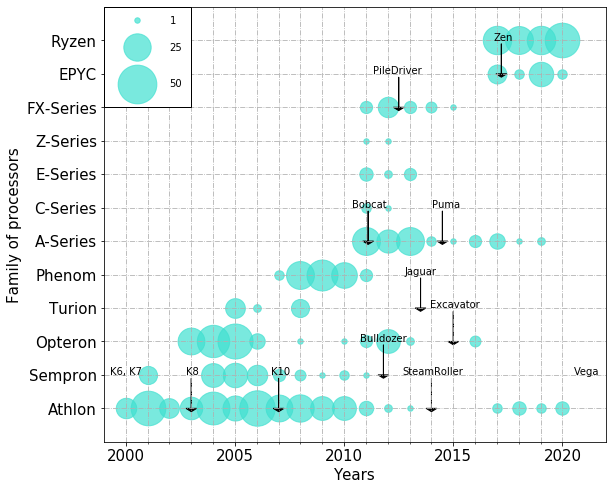

In [4]:
tech_df_intel = tech_df.query("Producer == 'AMD'")

test_df = tech_df_intel.groupby(["Range","rel_year"]).count()

vals = tech_df_intel["Range"].unique()
years = [k for k in range(2000, 2021)]


fig, ax = plt.subplots(figsize=((9,8)))

for y in years:
    for i in range(len(vals)):
        lab = vals[i]
        if (lab, y) in test_df.index:
            ax.scatter(y, i, s = 30*test_df.loc[(lab,y)]["Producer"], color = "turquoise", alpha =0.7)


arch_names = ["Bulldozer", "PileDriver", "SteamRoller", "Excavator", "Bobcat", "Jaguar", "Puma", "Zen",
             "K10", "K6, K7", "K8", "Vega"]
arch_years = [2011.8, 2012.5, 2014, 2015, 2011.1, 2013.5, 2014.5, 2017.2, 2007, 2000, 2003, 2021]
arch_position = [2, len(vals)-2, 1, 3, 6, 4, 6, len(vals)-1, 1, 1, 1, 1]
arch_decal = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
       
for i in range(len(arch_names)):
    ax.text(arch_years[i]-0.12*len(arch_names[i]), arch_position[i], arch_names[i])
    if not arch_decal[i]:
        ax.arrow(arch_years[i], arch_position[i]-0.1, 0, 
                 -0.9, head_width=0.5, head_length=0.1, fc='k', ec='k')
            
plt.xlabel("Years", size= 15)
plt.ylabel("Family of processors", size = 15)
ax.set_xticks([k for k in years if k %5==0], minor=False)
ax.set_xticklabels([k for k in years if k %5==0], Fontsize =15)
ax.set_xticks(years, minor=True)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor', linestyle = '-.')
plt.yticks(range(len(vals)), vals, size =15)

ax.grid(zorder=0, linestyle = '-.')
plt.xlim((1999, 2022))
plt.ylim(-1,len(vals))
ax.add_patch(
    pat.Rectangle(
        (1999, len(vals)-3),
        4,
        3,
        edgecolor = 'black',
        facecolor = 'white',
        fill=True,
        zorder=3))

plt.scatter(2000.5, len(vals)-0.4, s = 30, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-0.5,"1")
plt.scatter(2000.5, len(vals)-1.2, s =30*25, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-1.3,"25")
plt.scatter(2000.5, len(vals)-2.3, s =30*50, color = "turquoise", zorder =4, alpha =0.7)
plt.text(2002, len(vals)-2.4,"50")

plt.savefig('./results/fig1_amd.png', dpi=300)
plt.show()

### Figure 2

In [5]:
system_dir = './data/systems/'
hard_dir = './data/procs/'

to_keep = ['nb_models', 'ls_architecture', 'ls_cpuop-mode', 'ls_cpu', 'ls_threadpercore','ls_corepersocket', 
           'ls_socket', 'ls_numanode', 'ls_vendorid',  'ls_cpufamily', 'ls_model', 'ls_stepping', 
           'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz', 'ls_bogomips', 'ls_virtualization',
           'ls_l1dcache', 'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_vendor_id','cp_cpufamily', 'cp_model',
           'cp_stepping', 'cp_cpumhz', 'cp_cachesize', 
           'cp_physicalid', 'cp_siblings', 'cp_coreid', 'cp_cpucores', 'cp_apicid', 'cp_initialapicid',
           'cp_fpu', 'cp_fpu_exception', 'cp_cpuidlevel', 'cp_wp',
           'cp_bogomips', 'cp_clflushsize', 'cp_cache_alignment', 'cp_addresssizes', 'ls_range']

num = ['nb_models', 'ls_cpu', 'ls_threadpercore', 'ls_corepersocket', 'ls_socket', 'ls_numanode', 
       'ls_cpumhz', 'ls_cpumaxmhz', 'ls_cpuminmhz','ls_bogomips',  'ls_l1dcache', 
       'ls_l1icache', 'ls_l2cache', 'ls_l3cache', 'cp_cpumhz', 'cp_cachesize', 
       'cp_siblings', 'cp_cpucores', 'cp_fpu', 'cp_fpu_exception', 'cp_bogomips', 'ls_range']

categ = ['ls_architecture', 'ls_cpuop-mode', 'cp_addresssizes']
#

not_modif = ['ls_range']

# separate average perfs from standard deviations
def separate_perf(perf):
    raw_perf = []
    std_perf = []

    for p in perf:
        tab = str(p).replace(" ", "").split("+/-")
        raw_perf.append(tab[0])
        if len(tab) > 1:
            std_perf.append(tab[1])
        else:
            std_perf.append('')

    return (raw_perf, std_perf)

# load SKU information
envs = pd.read_csv("data/ls_cp_info_modif.csv").set_index("idPhoronix")
# we only keep the skus for which there is only one processor working
envs = envs.query("ls_cpu!='NaN'").query("nb_models==1")[to_keep]
envs = envs[num].join(pd.get_dummies(envs[categ]))

# standardise skuy info
for col in envs.columns:
    if col not in not_modif:
        envs[col] = [(k-np.mean(envs[col]))/np.std(envs[col]) for k in envs[col]]

# add profile information
for sys_name in os.listdir(system_dir):
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    if sys.shape[0]>10:
        sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]
        score, stds = separate_perf(sys['perf'])
        score = [float(k) for k in score]
        if score[0]<score[sys.shape[1]-1]:
            score = [k*(-1) for k in score]
        score = [(k-np.mean(score))/np.std(score) for k in score]
        sys.loc[:, sys_name[:-4]] = score
        sys = sys.set_index("id")
        sys = sys.drop(["idproc", "percentile", "descproc", "nbproc", "perf"], axis = 1)
        envs = envs.join(sys)

envs["scores"] = [np.mean(envs.iloc[i][30:envs.shape[1]]) for i in range(envs.shape[0])]
#envs = envs.drop(envs.columns[30:envs.shape[1]], axis=1)
envs

,nb_models,ls_cpu,ls_threadpercore,ls_corepersocket,ls_socket,ls_numanode,ls_cpumhz,ls_cpumaxmhz,ls_cpuminmhz,ls_bogomips,...,pts-t-test1,pts-vkpeak,pts-cpuminer-opt,pts-hdparm-read,pts-optcarrot,pts-betsy,pts-rocksdb,pts-f12015,pts-smhasher,scores
AArch64rev4,NaN,-0.349958,-0.899367,-0.488269,2.650734,NaN,NaN,-1.887124,-1.205116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.180573
AMDA10-4600MAPU,NaN,-0.349958,0.554929,-0.405927,-0.126089,NaN,-0.044795,NaN,NaN,-0.376518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.741924
AMDA10-5800KAPU,NaN,-0.349958,0.554929,-0.405927,-0.126089,-0.166675,-0.026578,NaN,NaN,1.269770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554143
AMDA10-6700APU,NaN,-0.349958,0.554929,-0.405927,-0.126089,-0.166675,-0.041759,0.609093,1.191496,1.161168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.280961
AMDA10-7700KAPUwithRadeonR7,NaN,-0.349958,0.554929,-0.405927,-0.126089,-0.166675,-0.034169,NaN,NaN,1.490392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.428856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POWER98-Core,NaN,0.700969,3.463520,0.088130,-0.126089,-0.166675,NaN,0.715044,1.856011,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.097833
POWER980-Core,NaN,2.502558,9.280703,-0.488269,8.204381,1.525497,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352270
POWER9altivecsupported44-Core,NaN,6.105736,3.463520,1.240928,0.799519,1.525497,NaN,0.715044,1.834223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101195
POWER9altivecsupported64-Core,NaN,1.902028,3.463520,0.088130,0.799519,1.525497,NaN,0.715044,1.834223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.172493


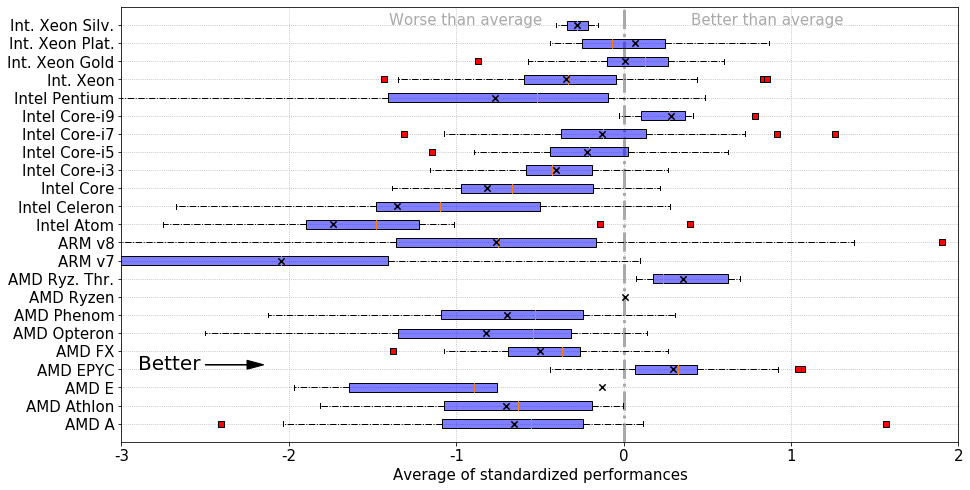

In [6]:
values = envs["ls_range"].unique()[1:]
val_modif =  ['AMD A', 'AMD Athlon', 'AMD E', 'AMD EPYC', 'AMD FX',
       'AMD Opteron', 'AMD Phenom', 'AMD Ryzen', 'AMD Ryz. Thr.',
       'ARM v7', 'ARM v8', 'Intel Atom', 'Intel Celeron', 'Intel Core',
       'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core-i9',
       'Intel Pentium', 'Int. Xeon', 'Int. Xeon Gold',
       'Int. Xeon Plat.', 'Int. Xeon Silv.']

score_dict = dict()
scores = []
for val in values:
    tab = envs.query("ls_range=='"+str(val)+"'")["scores"]
    scores.append(tab)
    score_dict[val] = tab

fig, ax = plt.subplots(figsize=((15,8)))

red_square = dict(markerfacecolor='r', marker='s')

ax.grid(zorder =0, linestyle = ':')

#ax.scatter([np.mean(l) for l in scores], range(1, 1+len(scores)),
#           marker="x", color = "white", alpha = 1, s = 20, zorder=5)
ax.scatter([np.mean(l) for l in scores], range(1, 1+len(scores)),
           marker="x", color = "black", alpha = 1, s = 40, zorder=4)

ax.boxplot(scores, flierprops=red_square,
          vert=False, patch_artist=True, widths=0.5,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))

ax.arrow(-2.5, 4.25, 0.25, 0, head_width=0.5, head_length=0.1, fc='k', ec='k', color= 'red')
ax.text(s = "Better", x = -2.9, y = 4, size = 20, color = 'black')

ax.text(s = "Better than average", x = 0.4, y = 23, size = 15, color = 'darkgray')
ax.text(s = "Worse than average", x = -1.4, y = 23, size = 15, color = 'darkgray')
plt.vlines(0, ymin=0, ymax=len(values)+2, linestyle ='-.', linewidth=3, color='darkgray')

plt.xlabel("Average of standardized performances", size = 15)

ax.set_xticklabels([-3+k for k in range(6)], Fontsize =15)
ax.set_yticklabels(val_modif, Fontsize =15)

plt.xlim((-3,2))
plt.ylim(0,len(values)+1)



plt.savefig("./results/fig2.png", dpi=300)
plt.show()


In [7]:
np.mean(score_dict["AMD Ryzen Threadripper"])

0.3572634972842645

In [8]:
np.mean(score_dict["AMD EPYC"])

0.2951081144826769

In [9]:
np.mean(score_dict["Intel Core-i9"])

0.28415302152400257

In [10]:
np.mean(score_dict["ARM v7"])

-2.0477290466681835

In [11]:
np.mean(score_dict["Intel Core-i3"])

-0.404057164742826

In [12]:
np.mean(score_dict["Intel Xeon Platinum"])

0.07069402294871216

#### GeekBench

In [13]:
with open('../cpu_selection-master/geek_data.json','r') as geek_data:
    geek_df = pd.DataFrame(json.load(geek_data))
    geek_df.columns = ['model number', 'freq', 'L2', 'L3', 'memory', 
                       'bench', 'single/multicore', 'score', 'perf']

geek_models = geek_df["model number"].unique()

geek_counts = dict()
intel_names = ["xeon", "i3", "i5", "i7", "core", "pentium", "celeron", "atom", "opteron"]

for ni in intel_names:
    geek_counts[ni] = 0

for spm in geek_models:
    spm = spm.lower()
    if 'xeon' in spm:
        geek_counts["xeon"]+=1
    elif 'i3' in spm:
        geek_counts["i3"]+=1
    elif 'i5' in spm:
        geek_counts["i5"]+=1
    elif 'i7' in spm:
        geek_counts["i7"]+=1
    elif 'core' in spm:
        geek_counts["core"]+=1
    elif 'pentium' in spm:
        geek_counts["pentium"]+=1
    elif "celeron" in spm:
        geek_counts["celeron"]+=1
    elif "atom" in spm:
        geek_counts["atom"]+=1
    elif "opteron" in spm:
        geek_counts["opteron"]+=1
    else:
        print(spm)

geek_values = [k for k in geek_counts.keys()]
geek_count = [geek_counts[k] for k in geek_values]

intel
8
qualcomm qualcomm
intel 000
amd engineering sample
intel 0000
common kvm
qemu virtual version 1.5.3
qemu virtual version ( 64-rhel6)
intel e2697v
intel e2695v
amd eng sample, zs212345tgg45_30/21/20_2/16
westmere e56xx/l56xx/x56xx (nehalem-c)


#### Phoronix

In [14]:
phoronix_values = envs.groupby("ls_range").count().index
phoronix_count = [np.max(envs.groupby("ls_range").count().iloc[i]) for i in range(len(phoronix_values))]

#### TechPowerUp

In [15]:
tech_df = pd.read_csv("./data/techpower_hard.csv")
tech_values = tech_df.groupby("Range").count().index
tech_count = [tech_df.groupby("Range").count()["Producer"].iloc[i] for i in range(len(tech_values))]

#### AMD

In [16]:
amd_df = pd.read_csv("./data/amd_specs.csv")
amd_values = amd_df.groupby("Family").count().index
amd_count = [np.max(amd_df.groupby("Family").count().iloc[i]) for i in range(len(amd_values))]

#### Spec 

In [17]:
spec = pd.read_csv("../cpu_selection-master/spec_data.csv")

spec_models = spec["model number"].unique()

spec_counts = dict()
intel_names = ["xeon", "i3", "i5", "i7", "core", "pentium", "celeron", "atom", "opteron"]

for ni in intel_names:
    spec_counts[ni] = 0

for spm in spec_models:
    spm = spm.lower()
    if 'xeon' in spm:
        spec_counts["xeon"]+=1
    elif 'i3' in spm:
        spec_counts["i3"]+=1
    elif 'i5' in spm:
        spec_counts["i5"]+=1
    elif 'i7' in spm:
        spec_counts["i7"]+=1
    elif 'core' in spm:
        spec_counts["core"]+=1
    elif 'pentium' in spm:
        spec_counts["pentium"]+=1
    elif "celeron" in spm:
        spec_counts["celeron"]+=1
    elif "atom" in spm:
        spec_counts["atom"]+=1
    else:
        print(spm)

spec_values = [k for k in spec_counts.keys()]
spec_count = [spec_counts[k] for k in spec_values]

In [18]:
cols = ["GeekBench", "Phoronix", "SPEC", "TechPower", "AMD"]

#print("Phoronix")
#print(phoronix_values)
#['AMD A' 'AMD Athlon' 'AMD E' 'AMD EPYC' 'AMD FX' 'AMD Opteron'
# 'AMD Phenom' 'AMD Ryzen' 'AMD Ryzen Threadripper' 'ARM v7' 'ARM v8'
# 'Intel Atom' 'Intel Celeron' 'Intel Core' 'Intel Core-i3' 'Intel Core-i5'
# 'Intel Core-i7' 'Intel Core-i9' 'Intel Pentium' 'Intel Xeon'
# 'Intel Xeon Gold' 'Intel Xeon Platinum' 'Intel Xeon Silver']

final_dict = dict()
for i in range(len(phoronix_values)):
    val = phoronix_values[i]
    final_dict["Phoronix", val] = phoronix_count[i]

#print("Geekbench")
#print(geek_values)
#['xeon', 'i3', 'i5', 'i7', 'core', 'pentium', 'celeron', 'atom', 'opteron']
geek_values = ['Intel Xeon', 'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core', 
               'Intel Pentium','Intel Celeron',  'Intel Atom', 'AMD Opteron']

for i in range(len(geek_values)):
    val = geek_values[i]
    final_dict["GeekBench", val] = geek_count[i]

#print("SPEC")
#print(spec_values)
#['xeon', 'i3', 'i5', 'i7', 'core', 'pentium', 'celeron', 'atom', 'opteron']
spec_values = ['Intel Xeon', 'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core', 
               'Intel Pentium','Intel Celeron',  'Intel Atom', 'AMD Opteron']

for i in range(len(spec_values)):
    val = spec_values[i]
    final_dict["SPEC", val] = spec_count[i]

#print("Tech")
#print(tech_values)
#['A-Series', 'Athlon', 'Atom', 'C-Series', 'Celeron', 'Core', 'E-Series',
#       'EPYC', 'FX-Series', 'Opteron', 'Pentium', 'Phenom', 'Ryzen', 'Sempron',
#       'Turion', 'Xeon', 'Z-Series']
tech_values = ['AMD A', 'AMD Athlon', 'Intel Atom',  'AMD C', 'Intel Celeron', 'Intel Cores',
                'AMD E', 'AMD EPYC', 'AMD FX', 'AMD Opteron', 'Intel Pentium', 'AMD Phenom', 'AMD Ryzen', 'AMD Sempron',  
                'AMD Turion', 'Intel Xeon', 'AMD Z']

for i in range(len(tech_values)):
    val = tech_values[i]
    final_dict["TechPower", val] = tech_count[i]

#print("AMD")
#print(amd_values)
#['AMD', 'AMD A-Series Processors', 'AMD Athlon™ Processors',
#       'AMD E-Series Processors', 'AMD EPYC™', 'AMD FX-Series Processors',
#       'AMD Opteron™', 'AMD Phenom™', 'AMD Ryzen™ Processors', 'AMD Sempron™', 'AMD Turion™']

amd_values = ['AMD', 'AMD A', 'AMD Athlon', 'AMD E', 'AMD EPYC', 'AMD FX', 
              'AMD Opteron', 'AMD Phenom', 'AMD Ryzen', 'AMD Sempron', 
              'AMD Turion']

for i in range(len(amd_values)):
    val = amd_values[i]
    final_dict["AMD", val] = amd_count[i]

final_values = []

for pho_val in phoronix_values:
    if pho_val not in final_values:
        final_values.append(pho_val)

for spec_val in spec_values:
    if spec_val not in final_values:
        final_values.append(spec_val)

for tech_val in tech_values:
    if tech_val not in final_values:
        final_values.append(tech_val)

for amd_val in amd_values:
    if amd_val not in final_values:
        final_values.append(amd_val)

final_values = final_values[:len(final_values)-1]
final_values

['AMD A',
 'AMD Athlon',
 'AMD E',
 'AMD EPYC',
 'AMD FX',
 'AMD Opteron',
 'AMD Phenom',
 'AMD Ryzen',
 'AMD Ryzen Threadripper',
 'ARM v7',
 'ARM v8',
 'Intel Atom',
 'Intel Celeron',
 'Intel Core',
 'Intel Core-i3',
 'Intel Core-i5',
 'Intel Core-i7',
 'Intel Core-i9',
 'Intel Pentium',
 'Intel Xeon',
 'Intel Xeon Gold',
 'Intel Xeon Platinum',
 'Intel Xeon Silver',
 'AMD C',
 'Intel Cores',
 'AMD Sempron',
 'AMD Turion',
 'AMD Z']

In [19]:
fig3_df = pd.DataFrame()
fig3_df["model"] = final_values
fig3_df = fig3_df.set_index("model")

for c in cols:
    fig3_df[c] = [final_dict[(c, val)] if (c, val) in final_dict else 0 for val in final_values]

#fig3_df.to_csv("./results/fig3.csv")
# manual regrouping and removing ARM architectures

In [20]:
fig3_df = pd.read_csv("./results/fig3.csv")
fig3_amd_df = pd.read_csv("./results/fig3_amd.csv")

for i in range(len(cols)):
    col = cols[i]
    for j in range(i,len(cols)):
        col2 = cols[j]
        if col == "AMD" or col2 == "AMD":
            print(col, col2, stats.ks_2samp(fig3_amd_df[col], fig3_amd_df[col2]).pvalue)
        else:
            print(col, col2, stats.ks_2samp(fig3_df[col], fig3_df[col2]).pvalue)

GeekBench GeekBench 1.0
GeekBench Phoronix 0.0005909905798671092
GeekBench SPEC 0.7102038997076623
GeekBench TechPower 0.001920719384568105
GeekBench AMD 0.0014969550573265746
Phoronix Phoronix 1.0
Phoronix SPEC 0.001920719384568105
Phoronix TechPower 0.07789836549197329
Phoronix AMD 0.5360977695073805
SPEC SPEC 1.0
SPEC TechPower 0.03561137027640743
SPEC AMD 0.00020413023508998745
TechPower TechPower 1.0
TechPower AMD 0.5360977695073805
AMD AMD 1.0


### Figure 4

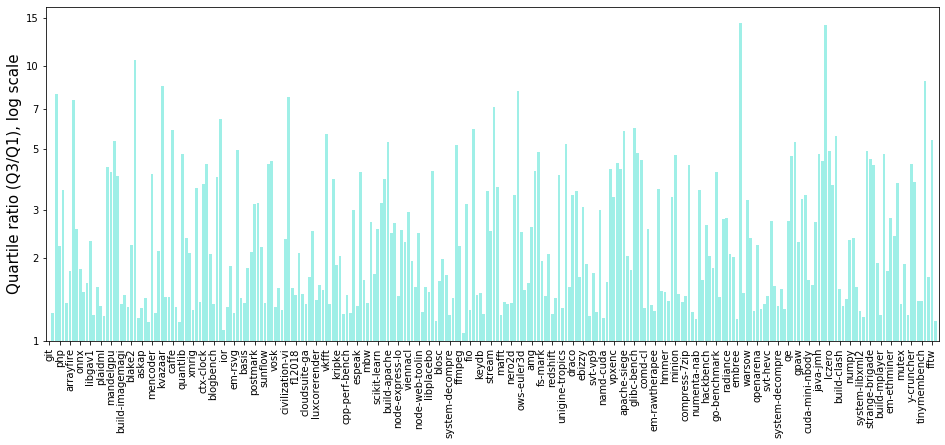

In [131]:
# load SKU information
envs = pd.read_csv("data/ls_cp_info_modif.csv").set_index("idPhoronix")
# we only keep the skus for which there is only one processor working
envs = envs.query("ls_cpu!='NaN'").query("nb_models==1")[to_keep]
envs = envs[num].join(pd.get_dummies(envs[categ]))
names = os.listdir(system_dir)

# add profile information
for sys_name in names:
    sys = pd.read_csv(system_dir+sys_name, index_col = 0)
    if sys.shape[0]>10:
        sys["id"] = [k.replace("/s/", "").replace("+", "") for k in sys["idproc"]]
        score, stds = separate_perf(sys['perf'])
        score = [float(k) for k in score]
        if score[0]<score[sys.shape[1]-1]:
            score = [k*(-1) for k in score]
        sys.loc[:, sys_name[:-4]] = score
        sys = sys.set_index("id")
        sys = sys.drop(["idproc", "percentile", "descproc", "nbproc", "perf"], axis = 1)
        envs = envs.join(sys)

qratios = [max(np.nanpercentile(envs[c],75)/np.nanpercentile(envs[c],25),
               np.nanpercentile(envs[c],25)/np.nanpercentile(envs[c],75)) for c in cols]
ns = [names[i] for i in range(len(qratios)) if not np.isnan(qratios[i])]
qrs = [qr for qr in qratios if not np.isnan(qr)]

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(range(1, len(qrs)+1), [np.log10(k) for k in qrs], color = "turquoise", alpha = 0.5)

plt.xticks([k for k in range(len(qrs)) if k%3==0], 
           [ns[i][4:][:-4][0:15] for i in range(len(ns)) if i%3==0], 
           rotation='vertical')

plt.xlim(-1, 260)

t = [1, 2, 3, 5, 7, 10, 15]

ticks = []
ticks.extend([np.round(np.log10(k),3) for k in t])

labticks = []
labticks.extend(t)

plt.yticks(ticks, labticks)

#ax.set_yscale('log')
#ax.set_yticklabels([k*2 for k in range(8)], Fontsize =15)

plt.ylabel("Quartile ratio (Q3/Q1), log scale", size = 15)

plt.subplots_adjust(bottom=0.3)

plt.savefig("./results/fig4.png", dpi = 300)

plt.show()

### Figure 5

### OLD Figure 3

<Figure size 1440x1440 with 0 Axes>

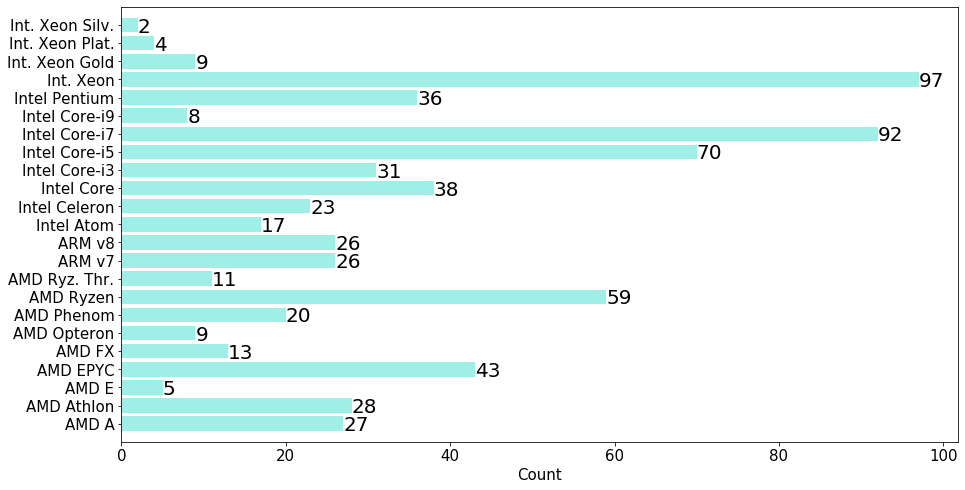

In [21]:
count = [np.max(envs.groupby("ls_range").count().iloc[i]) for i in range(len(values))]

plt.figure(figsize=(20,20))

val_modif =  ['AMD A', 'AMD Athlon', 'AMD E', 'AMD EPYC', 'AMD FX',
       'AMD Opteron', 'AMD Phenom', 'AMD Ryzen', 'AMD Ryz. Thr.',
       'ARM v7', 'ARM v8', 'Intel Atom', 'Intel Celeron', 'Intel Core',
       'Intel Core-i3', 'Intel Core-i5', 'Intel Core-i7', 'Intel Core-i9',
       'Intel Pentium', 'Int. Xeon', 'Int. Xeon Gold',
       'Int. Xeon Plat.', 'Int. Xeon Silv.']

fig, ax = plt.subplots(figsize=(15,8))

for i in range(len(count)):
    plt.text(count[i], i+0.6, str(count[i]), size =20)

#ax.grid(zorder =0, linestyle = ':')

ax.barh(range(1, len(count)+1), count, color = "turquoise", alpha = 0.5)

plt.xlabel("Count", size = 15)

plt.yticks(range(1, len(val_modif)+1), val_modif)
ax.set_xticklabels([0+k*20 for k in range(6)], Fontsize =15)
ax.set_yticklabels(val_modif, Fontsize =15)

#plt.xlim((-3,2))
plt.ylim(0,len(values)+1)

plt.savefig("./results/fig3.png")
plt.show()


In [22]:
np.sum(count)

694